# Titanic challenge

## Load data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
train_df = pd.read_csv("../../data/train.csv")
test_df = pd.read_csv("../../data/test.csv")

In [3]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print("__Test_DataSet_")
test_df.head()

__Test_DataSet_


,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Identifying Missing Value

In [5]:
def missing_data(data):
    # print(data.isnull())
    total = data.isnull().sum().sort_values(ascending=False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending=False)
    ms = pd.concat([total, percent], axis=1, keys=["Total", "Percent"])
    ms = ms[ms["Percent"] > 0]
    f,ax = plt.subplots(figsize=(8,6))
    plt.xticks(rotation=90)
    fig = sns.barplot(x=ms.index, y=ms["Percent"],color="green",alpha=0.8)
    plt.xlabel("Features", fontsize=15)
    plt.ylabel("Percent of missing values", fontsize=15)
    plt.title("Percent missing data by feature", fontsize=15)
    return ms

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


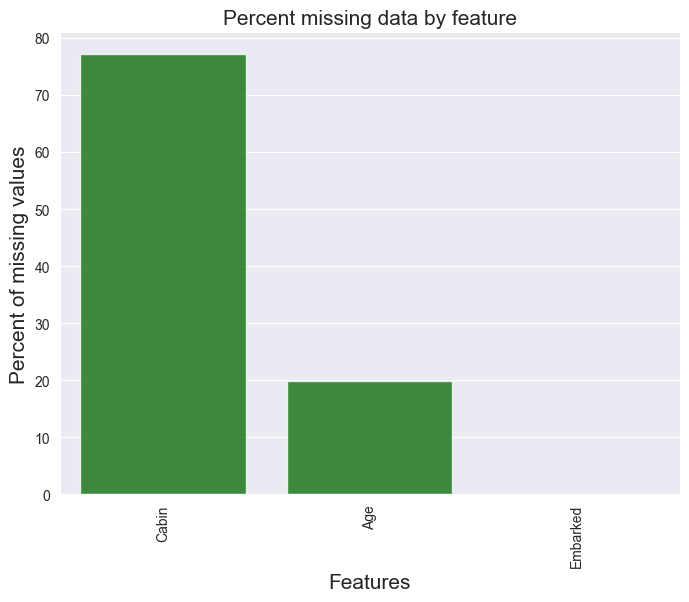

In [6]:
missing_data(train_df)

## Filling missing values

In [7]:
test_df["Age"].mean()

30.272590361445783

In [8]:
train_df["Embarked"].fillna(train_df["Embarked"].mode()[0], inplace=True)

In [9]:
test_df["Fare"].fillna(test_df["Fare"].median(), inplace=True)

## Cabin Features has more than 75% of missing data in both Test and train data, so we are remove the Cabin

In [10]:
drop_column = ["Cabin"]
train_df.drop(drop_column, axis=1, inplace=True)
test_df.drop(drop_column, axis=1, inplace=True)

## Both the test and train Age features contains more the 15% of missing Data so we are fill with the median

In [11]:
test_df["Age"].fillna(test_df["Age"].median(), inplace=True)
train_df["Age"].fillna(train_df["Age"].median(), inplace=True)

In [12]:
print('Check the missing value in train data')
print(train_df.isnull().sum())
print('___'*30)
print('Check the missing value in test data')
print(test_df.isnull().sum())

Check the missing value in train data
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64
__________________________________________________________________________________________
Check the missing value in test data
PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64


## Combine train and test data to apply some function

In [13]:
all_data = [train_df, test_df]

## Create new feature FamilySize as a combination of SibSp and Parch

In [14]:
for dataset in all_data:
    dataset["FamilySize"] = dataset["SibSp"] + dataset["Parch"] + 1

In [15]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    dataset["Title"] = dataset["Name"].apply(get_title)
# Group all non-common titles into one single grouping "Rare"
for dataset in all_data:
    dataset["Title"] = dataset["Title"].replace(["Lady", "Countess","Capt", "Col","Don", "Dr", "Major", "Rev", "Sir", "Jonkheer", "Dona"], "Rare")
    dataset["Title"] = dataset["Title"].replace("Mlle", "Miss")
    dataset["Title"] = dataset["Title"].replace("Ms", "Miss")
    dataset["Title"] = dataset["Title"].replace("Mme", "Mrs")

In [16]:
## Create bin for age features

In [17]:
for dataset in all_data:
    dataset["Age_bin"] = pd.cut(dataset["Age"], bins=[0,12,20,50,120], labels=["Children", "Teenage", "Adult", "Elder"])

## Create bin for age features

In [18]:
for dataset in all_data:
    dataset["Fare_bin"] = pd.cut(dataset["Fare"], bins=[0,7.91, 14.45, 31, 120], labels=["Low_fare", "median_fare", "Average_fare", "high_fare"])

## For our reference making a copy of both DataSet start working for copy of dataset

In [19]:
traindf = train_df
testdf = test_df

In [20]:
all_dat = [traindf, testdf]

In [21]:
for dataset in all_dat:
    drop_column = ["Age" ,"Fare", "Name", "Ticket"]
    dataset.drop(drop_column, axis=1, inplace=True)

In [22]:
drop_column = ["PassengerId"]
traindf.drop(drop_column, axis=1, inplace=True)

In [23]:
testdf.head(2)

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,FamilySize,Title,Age_bin,Fare_bin
0,892,3,male,0,0,Q,1,Mr,Adult,Low_fare
1,893,3,female,1,0,S,2,Mrs,Adult,Low_fare


In [24]:
traindf = pd.get_dummies(traindf, columns = ["Sex", "Title", "Age_bin", "Embarked", "Fare_bin"], prefix=["Sex", "Title", "Age_type", "Embarked", "Fare_type"])
testdf = pd.get_dummies(testdf, columns = ["Sex", "Title", "Age_bin", "Embarked", "Fare_bin"], prefix=["Sex", "Title", "Age_type", "Embarked", "Fare_type"])

In [25]:
testdf.head()

,PassengerId,Pclass,SibSp,Parch,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,Title_Mr,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Embarked_C,Embarked_Q,Embarked_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,892,3,0,0,1,False,True,False,False,True,...,False,True,False,False,True,False,True,False,False,False
1,893,3,1,0,2,True,False,False,False,False,...,False,True,False,False,False,True,True,False,False,False
2,894,2,0,0,1,False,True,False,False,True,...,False,False,True,False,True,False,False,True,False,False
3,895,3,0,0,1,False,True,False,False,True,...,False,True,False,False,False,True,False,True,False,False
4,896,3,1,1,3,True,False,False,False,False,...,False,True,False,False,False,True,False,True,False,False


## Correlation between the features
### What is correlation?
In machine learning, correlation refers to the relationship between two variables. More specifically, it refers to how changes in one variable are related to changes in another variable. Correlation can be positive, negative, or neutral, and it can range from -1 to 1.

A positive correlation means that as one variable increases, the other variable also increases. For example, there is a positive correlation between the amount of exercise a person does and their overall health.
A negative correlation means that as one variable increases, the other variable decreases. For example, there is a negative correlation between the amount of junk food a person eats and their overall health.
A neutral correlation means that there is no relationship between the two variables. For example, there is no correlation between a person's height and the color of their hair.

In machine learning, correlation is often used to identify features that are highly correlated with the target variable. Highly correlated features can be problematic because they can lead to overfitting, where the model performs well on the training data but poorly on new data. To avoid overfitting, it is often necessary to remove highly correlated features or to use regularization techniques that penalize the model for using too many features.

### How is correlation calculated?
The math formula for correlation between two variables X and Y can be expressed using the Pearson correlation coefficient, which is the most common measure of correlation. The formula for the Pearson correlation coefficient is:
r = (nΣXY - ΣXΣY) / sqrt[(nΣX^2^ - (ΣX)^2^)(nΣY^2^ - (ΣY)^2^)]
where:
* n is the number of observations
* ΣXY is the sum of the products of each X and Y pair
* ΣX and ΣY are the sums of X and Y, respectively
* ΣX^2^ and ΣY^2^ are the sums of the squares of X and Y, respectively
* The Pearson correlation coefficient measures the strength and direction of the linear relationship between X and Y. The value of r ranges from -1 to 1, where a value of -1 indicates a perfectly negative correlation, a value of 0 indicates no correlation, and a value of 1 indicates a perfectly positive correlation. A correlation coefficient of 0.5 or greater is generally considered a strong correlation, while a coefficient of less than 0.3 is considered weak.

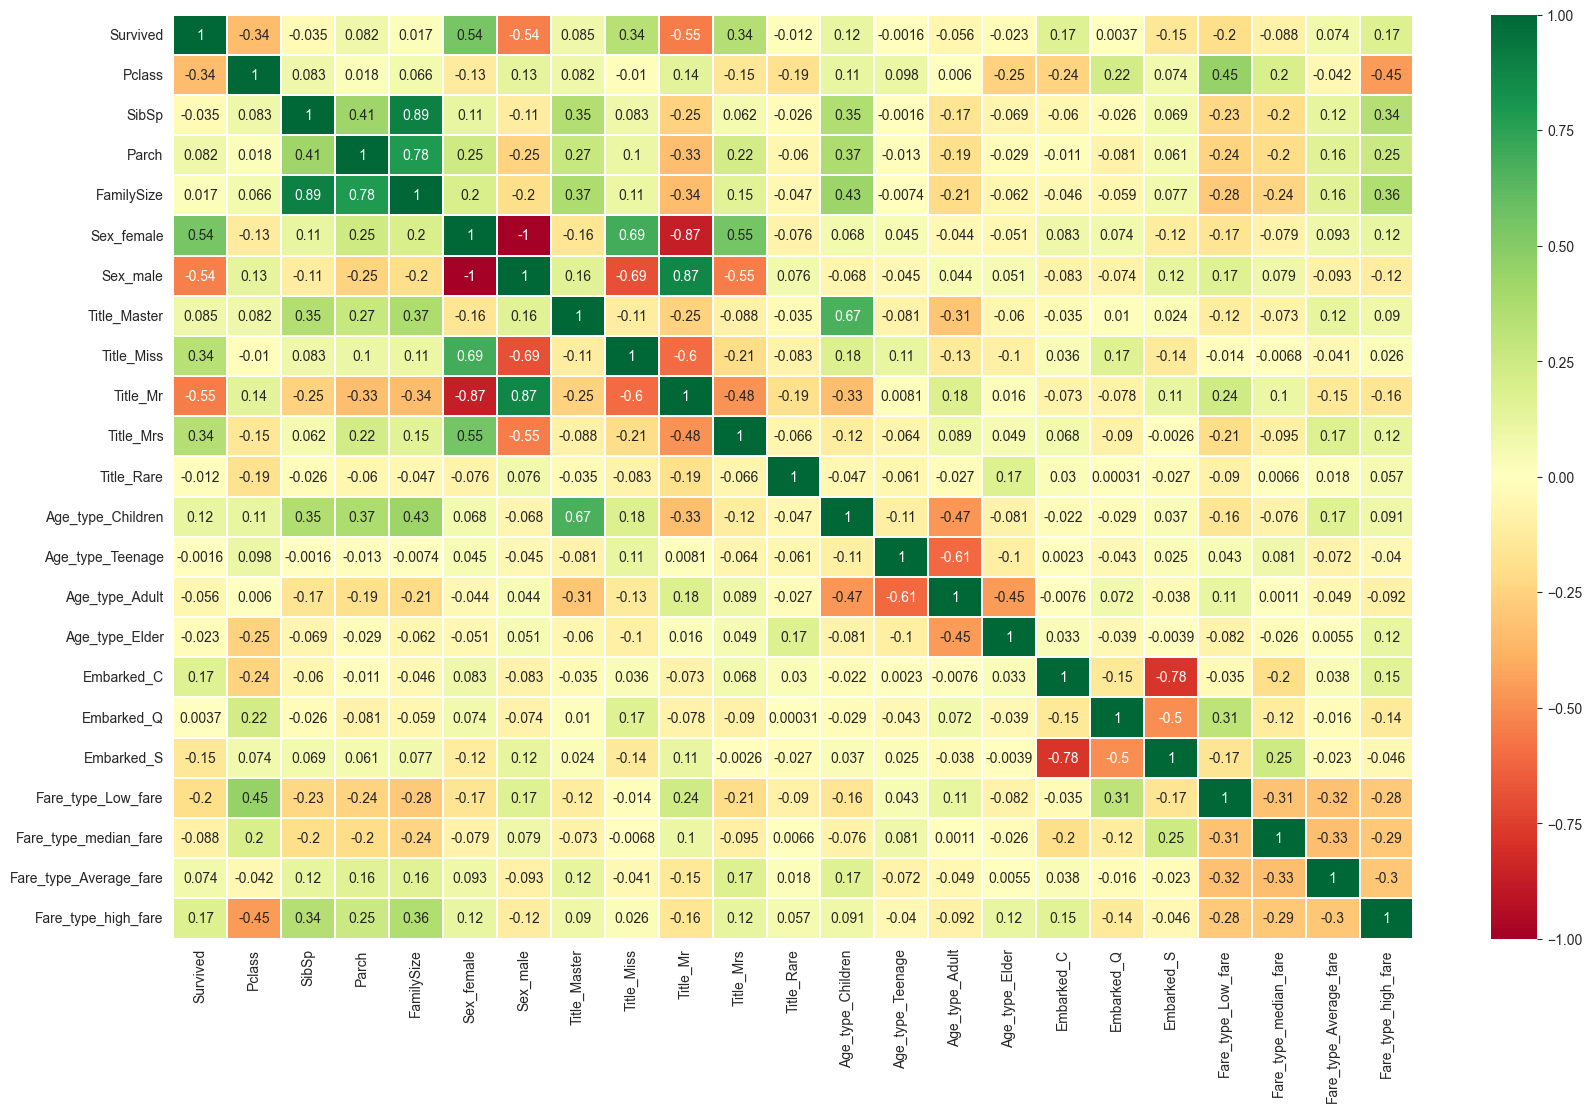

In [26]:
sns.heatmap(traindf.corr(),annot=True,cmap="RdYlGn", linewidths=0.2) #data.corr()-->correlation matrix
fig = plt.gcf()
fig.set_size_inches(20,12)
plt.show()

## Pairplots

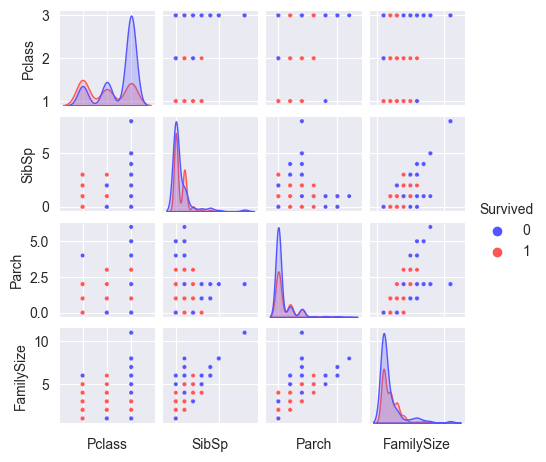

In [27]:
g = sns.pairplot(data=train_df, hue='Survived', palette = 'seismic',
                 height=1.2,diag_kind = 'kde',diag_kws=dict(fill=True),plot_kws=dict(s=10) )
g.set(xticklabels=[])

## Import functions

In [28]:
from sklearn.model_selection import train_test_split # to split data
from sklearn.metrics import accuracy_score # for accuracy_score
from sklearn.model_selection import KFold # for K-fold cross validation
from sklearn.model_selection import cross_val_score # score evaluation
from sklearn.model_selection import cross_val_predict # predictions
from sklearn.metrics import confusion_matrix # for confusion matrix
all_features = traindf.drop("Survived", axis=1)
targeted_feature = traindf["Survived"]
X_train, X_test, y_train, y_test = train_test_split(all_features, targeted_feature, test_size=0.3,random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((623, 22), (268, 22), (623,), (268,))

## Notes

### What is K-fold?
K-fold cross-validation is a common technique used in machine learning for evaluating the performance of a model on a limited dataset. The basic idea is to split the dataset into k equal parts (or "folds"), use k-1 folds for training the model, and use the remaining fold for testing. This process is repeated k times, with each fold used once for testing and the other k-1 folds used for training. The results from each fold are averaged to give an estimate of the model's performance.

The k-fold cross-validation procedure is useful because it allows us to use all the data for training and testing, while also reducing the variance of the performance estimate. When evaluating a model on a limited dataset, the performance estimate can be highly dependent on the particular samples used for training and testing. K-fold cross-validation helps to reduce this variance by averaging the results over k different train-test splits.

There are several variations of k-fold cross-validation, including stratified k-fold cross-validation (which preserves the class distribution in each fold) and nested k-fold cross-validation (which is used for model selection and hyperparameter tuning). Overall, k-fold cross-validation is a powerful and widely used technique for evaluating the performance of machine learning models on limited datasets.

### What is cross validated score?
In machine learning, cross-validated score is a performance metric that is used to evaluate the effectiveness of a model. It is calculated using cross-validation, which is a technique for assessing how well a model can generalize to new data.

Cross-validation involves splitting the available data into two sets: a training set and a validation set. The model is trained on the training set, and then its performance is evaluated on the validation set. This process is repeated multiple times with different splits of the data, and the results are averaged to give an estimate of the model's performance.

The cross-validated score is the average performance across all the validation sets. It is a measure of how well the model is likely to perform on new, unseen data. Cross-validation is a powerful technique for assessing the quality of a model and selecting the best hyperparameters. It can help prevent overfitting and ensure that the model is not relying too heavily on a specific subset of the data.

There are different types of cross-validation techniques, including k-fold cross-validation, leave-one-out cross-validation, and stratified cross-validation. Each has its own advantages and disadvantages, depending on the specific characteristics of the data and the problem being solved.

### What is Confusion Matrix?
In machine learning, a confusion matrix is a table that summarizes the performance of a classification model by showing the number of true positive, true negative, false positive, and false negative predictions. It is a way to visualize how well a classification model is performing on a specific dataset.

A confusion matrix is usually represented in a tabular format with two rows and two columns. The rows represent the actual (or true) class labels, while the columns represent the predicted class labels. The four cells of the matrix represent the number of instances that belong to each combination of actual and predicted classes.

The four cells in a confusion matrix are:
- True positive (TP): the number of instances that are correctly classified as positive.
- False positive (FP): the number of instances that are incorrectly classified as positive.
- True negative (TN): the number of instances that are correctly classified as negative.
- False negative (FN): the number of instances that are incorrectly classified as negative.

From the confusion matrix, various performance metrics can be calculated to evaluate the model's performance, such as accuracy, precision, recall, and F1-score. These metrics can help to identify the strengths and weaknesses of the model and guide improvements to the model's design and training.

Overall, a confusion matrix is a useful tool for assessing the performance of a classification model and gaining insights into its behavior on a specific dataset.

## Logistic Regression
### What is logistic Regression?
Logistic regression is a type of statistical model used for binary classification problems, where the goal is to predict a binary outcome (i.e., 0 or 1, yes or no) based on one or more input features. It is a type of supervised learning algorithm that is commonly used in machine learning and data science.

In logistic regression, the output variable is modeled as a probability of the positive class given the input features. The logistic function, also known as the sigmoid function, is used to transform the output of the linear regression model to a probability value between 0 and 1. The logistic function has an S-shaped curve and maps any real-valued input to a value between 0 and 1, which can be interpreted as the probability of the positive class.

The logistic regression model is trained on a labeled dataset, where each example has a set of input features and a binary label indicating the positive or negative class. During training, the model learns the parameters (weights and biases) that best fit the data, minimizing a loss function that measures the difference between the predicted probabilities and the true labels.

Once the model is trained, it can be used to predict the binary class of new examples based on their input features. The logistic regression model makes predictions by computing the probability of the positive class given the input features, and then making a binary decision based on a threshold value (usually 0.5).

Logistic regression is a simple and interpretable algorithm that can be used for a wide range of binary classification problems, such as spam detection, disease diagnosis, and customer churn prediction. It is also a foundational algorithm for more advanced machine learning techniques such as neural networks.

----------------------------The Accuracy of the model----------------------------
The accuracy of the Logistic Regression is 82.46
The cross validated score for Logistic Regression is: 81.93


Text(0.5, 1.05, 'Confusion matrix')

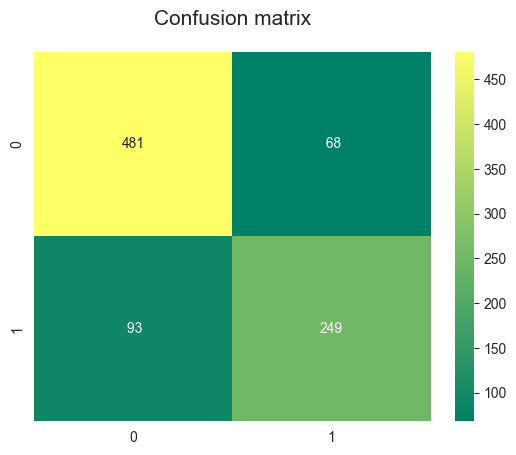

In [29]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)
prediction_lr = model.predict(X_test)
print("----------------------------The Accuracy of the model----------------------------")
print("The accuracy of the Logistic Regression is", round(accuracy_score(prediction_lr, y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data in 10 equal parts
result_lr = cross_val_score(model, all_features, targeted_feature, cv=10, scoring="accuracy")
print("The cross validated score for Logistic Regression is:", round(result_lr.mean()*100,2))
y_pred = cross_val_predict(model, all_features, targeted_feature, cv=10)
sns.heatmap(confusion_matrix(targeted_feature, y_pred), annot=True, fmt="3.0f", cmap="summer")
plt.title("Confusion matrix", y=1.05, size=15)

## Random Forrest Classifier
### What is Random Forrest Classifier?
Random Forest Classifier is a popular machine learning algorithm used for both classification and regression tasks. It is an ensemble learning algorithm that combines multiple decision trees to improve the performance and reduce the risk of over-fitting.
In the Random Forest Classifier algorithm, a large number of decision trees are trained independently on different subsets of the training data, using a technique called bootstrapping. Each tree is trained using a random subset of features, which helps to reduce the correlation between the trees and improve the accuracy of the ensemble.

To make a prediction, the Random Forest Classifier algorithm aggregates the predictions of all the individual trees in the ensemble. For classification tasks, the algorithm assigns the class that receives the most votes among the individual trees. For regression tasks, the algorithm takes the average of the individual tree predictions.

Random Forest Classifier has several advantages over other machine learning algorithms. It can handle a large number of input variables, and it can provide an estimate of the relative importance of each variable in the classification task. It is also relatively fast to train and can be easily parallelized for larger datasets.

Overall, Random Forest Classifier is a powerful and versatile machine learning algorithm that is widely used for both classification and regression tasks in various fields such as finance, healthcare, and marketing.

### What is a decision tree?
In machine learning, a decision tree is a simple and popular algorithm used for both classification and regression tasks. It is a type of supervised learning algorithm that builds a tree-like model of decisions and their possible consequences.

The decision tree algorithm works by recursively splitting the dataset into subsets based on the values of the input features, and then making decisions based on the subset that leads to the highest information gain or the lowest impurity. The result is a tree-like structure where each internal node represents a decision based on an input feature, each branch represents the possible values of that feature, and each leaf node represents a final decision or prediction.

Decision trees are useful because they are easy to interpret and can handle both categorical and numerical data. They are also flexible, as they can be used for both classification and regression tasks and can handle multi-class classification problems. However, decision trees are prone to overfitting and can become overly complex, leading to poor generalization performance.

To address these issues, various techniques have been developed, such as pruning the tree to reduce its complexity, using ensembles of decision trees such as Random Forests, and using boosted decision trees such as Gradient Boosting. These techniques improve the performance and robustness of the decision tree algorithm and make it more suitable for real-world applications.

----------------------------The Accuracy of the model----------------------------
The accuracy of the Random Forest Classifier is 83.96
The cross validated score for Random Forest Classifier is: 83.17


Text(0.5, 1.05, 'Confusion Matrix')

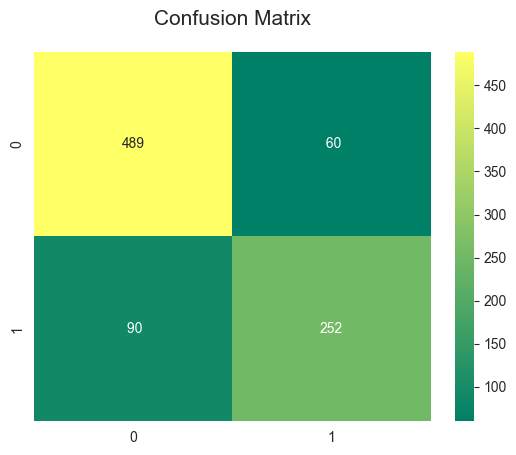

In [30]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(criterion="gini", n_estimators=700, min_samples_split=10, min_samples_leaf=1, oob_score=True, random_state=1, n_jobs=-1)
model.fit(X_train, y_train)
prediction_rm = model.predict(X_test)
print("----------------------------The Accuracy of the model----------------------------")
print("The accuracy of the Random Forest Classifier is", round(accuracy_score(prediction_rm, y_test)*100, 2))
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
result_rm = cross_val_score(model, all_features, targeted_feature, cv=10, scoring="accuracy")
print("The cross validated score for Random Forest Classifier is:", round(result_rm.mean()*100, 2))
y_pred = cross_val_predict(model, all_features, targeted_feature, cv=10)
sns.heatmap(confusion_matrix(targeted_feature, y_pred), annot=True, fmt="3.0f", cmap="summer")
plt.title("Confusion Matrix", y=1.05, size=15)

## Support Vector Machines
### What is Support Vector Machines?
Support Vector Machines (SVM) is a supervised learning algorithm used for classification and regression analysis. SVM is a powerful and versatile algorithm that can be used for a wide range of applications, including image classification, text classification, and financial forecasting.

SVM works by finding the best hyperplane that separates the data points into different classes. A hyperplane is a decision boundary that separates the data points based on their features. The SVM algorithm selects the hyperplane that maximizes the margin between the classes, which is the distance between the hyperplane and the nearest data points from each class. The data points closest to the hyperplane are called support vectors, and they are used to define the hyperplane.

SVM can handle both linear and nonlinear classification problems by using different kernel functions. A kernel function maps the input data into a higher-dimensional space, where it becomes easier to separate the data points into different classes.

The advantages of SVM include:

- SVM works well with high-dimensional data and can handle a large number of features.
- SVM can handle both linear and nonlinear classification problems by using different kernel functions.
- SVM is less prone to overfitting than other algorithms, such as decision trees and neural networks.

The disadvantages of SVM include:

- SVM can be computationally expensive, especially when dealing with large datasets.
- SVM can be sensitive to the choice of kernel function and its parameters.
- SVM does not provide probability estimates for the predicted classes, which can be useful in some applications.

Overall, SVM is a powerful and versatile algorithm that can be used for a wide range of applications. However, it's important to carefully choose the kernel function and its parameters and consider the computational resources required when using SVM for large datasets.

### What is the mathematics behind SVM?
The math behind Support Vector Machines (SVM) involves finding the best hyperplane that separates the data points into different classes. The hyperplane is chosen in such a way that the margin, or the distance between the hyperplane and the closest points from each class, is maximized.
To find the hyperplane, SVM solves an optimization problem using Lagrange multipliers. The optimization problem is formulated as:
- minimize: 1/2 * ||w||^2
- subject to: y(i) * (w * x(i) + b) >= 1 for all i = 1, 2, ..., n
- where w is the weight vector, b is the bias term, x(i) is the i-th data point, y(i) is its corresponding class label (+1 or -1), and n is the number of data points.
- The objective function, 1/2 * ||w||^2, represents the margin between the hyperplane and the closest points from each class. The margin is defined as the distance between the hyperplane and the closest points from each class, divided by the norm of the weight vector.
- The constraints, y(i) * (w * x(i) + b) >= 1, ensure that the hyperplane separates the data points into different classes. The constraints are such that the product of the class label and the distance between the data point and the hyperplane is always greater than or equal to 1.

Solving this optimization problem using Lagrange multipliers results in a set of dual variables, which can be used to compute the weight vector and bias term of the hyperplane. The data points closest to the hyperplane, called support vectors, are used to define the hyperplane.
SVM can handle nonlinear classification problems by using kernel functions, which map the input data into a higher-dimensional space. In the dual formulation of the optimization problem, the kernel function appears as a dot product between the data points in the higher-dimensional space.
Overall, SVM involves solving an optimization problem using Lagrange multipliers to find the hyperplane that maximizes the margin between the classes. The use of kernel functions allows SVM to handle nonlinear classification problems.

----------------------------The Accuracy of the model----------------------------
The accuracy of the Support Vector Machines Classifier is 83.58
The cross validated score for Support Vector Machines Classifier is: 83.28


Text(0.5, 1.05, 'Confusion_matrix')

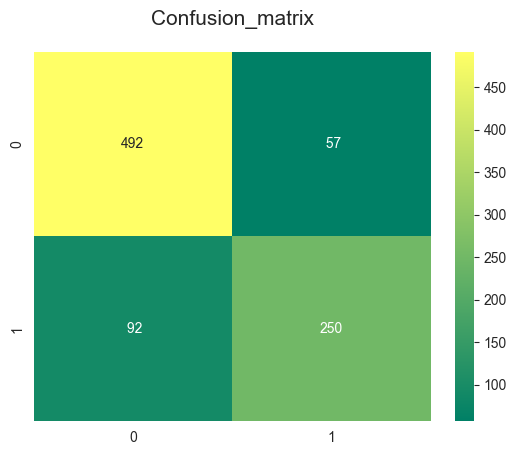

In [31]:
from sklearn.svm import SVC, LinearSVC

model = SVC()
model.fit(X_train, y_train)
prediction_svm = model.predict(X_test)
print("----------------------------The Accuracy of the model----------------------------")
print("The accuracy of the Support Vector Machines Classifier is", round(accuracy_score(prediction_svm, y_test)*100, 2))
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
result_svm = cross_val_score(model, all_features, targeted_feature, cv=10, scoring="accuracy")
print("The cross validated score for Support Vector Machines Classifier is:", round(result_svm.mean()*100,2))
y_pred = cross_val_predict(model, all_features, targeted_feature, cv=10)
sns.heatmap(confusion_matrix(targeted_feature,y_pred), annot=True, fmt="3.0f", cmap="summer")
plt.title("Confusion_matrix", y=1.05, size=15)

## KNN Classifier

### What is KNN Classifier?
KNN (K-Nearest Neighbors) Classifier is a non-parametric machine learning algorithm that can be used for classification and regression tasks. It is a type of instance-based learning, where the algorithm memorizes the training dataset and uses it to classify new instances based on their similarity to the instances in the training set.

In the case of classification, given a new instance, the KNN algorithm finds the K closest instances in the training set (i.e., the K-nearest neighbors) based on some distance metric (such as Euclidean distance). The class of the new instance is then determined by the majority class among the K-nearest neighbors. For example, if the majority class among the K-nearest neighbors is "red", the new instance is classified as "red".

In the case of regression, the KNN algorithm finds the K nearest neighbors to a new instance and predicts its value by taking the mean or median of the values of the K-nearest neighbors.

KNN Classifier has some advantages, such as being simple and easy to understand, not requiring training time, and being able to handle multi-class classification problems. However, it can be computationally expensive and sensitive to the choice of K and the distance metric.

Overall, KNN Classifier is a useful machine learning algorithm that can be applied in a variety of applications, such as image classification, text classification, and recommendation systems.

### What is the math behind KNN Classifier?
The math behind KNN (K-Nearest Neighbors) Classifier involves computing the distance between the new instance and the instances in the training set. The K nearest neighbors are then selected based on their distance to the new instance, and the class of the new instance is determined based on the majority class among the K-nearest neighbors.

The distance metric used to compute the distance between the instances can vary depending on the problem and data type. Euclidean distance is a commonly used metric for continuous data, while Hamming distance is used for categorical data.

More formally, given a new instance x, let D(x, xi) be the distance between x and the training instance xi. The KNN Classifier algorithm can be described as follows:

1. For each training instance xi, compute the distance D(x, xi) between x and xi.
2. Sort the training instances in increasing order of their distance to x.
3. Select the K nearest neighbors to x based on their distance.
4. Determine the class of x based on the majority class among the K-nearest neighbors. For example, if the majority class among the K-nearest neighbors is "red", x is classified as "red".

In the case of regression, the KNN algorithm instead computes the mean or median value of the target variable among the K-nearest neighbors, and uses this value to predict the value of the new instance.
Overall, KNN Classifier involves computing the distance between the new instance and the instances in the training set, selecting the K nearest neighbors, and determining the class of the new instance based on the majority class among the K-nearest neighbors.

----------------------------The Accuracy of the model----------------------------
The accuracy of the K Nearst Neighbors Classifier is 80.6
The cross validated score for K Nearest Neighbours Classifier is: 81.26


Text(0.5, 1.05, 'Confusion_matrix')

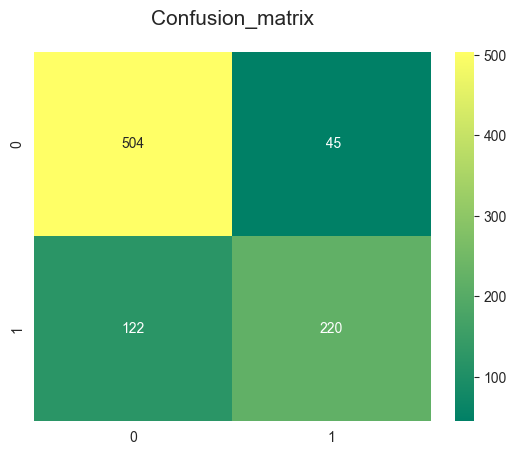

In [32]:
from sklearn.neighbors import KNeighborsClassifier


model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
prediction_knn = model.predict(X_test)
print("----------------------------The Accuracy of the model----------------------------")
print("The accuracy of the K Nearst Neighbors Classifier is", round(accuracy_score(prediction_knn, y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22, shuffle=True) # k=10, split the data into 10 equal parts
result_knn = cross_val_score(model, all_features, targeted_feature, cv=10, scoring="accuracy")
print("The cross validated score for K Nearest Neighbours Classifier is:",round(result_knn.mean()*100,2))
y_pred = cross_val_predict(model, all_features, targeted_feature, cv=10)
sns.heatmap(confusion_matrix(targeted_feature, y_pred), annot=True, fmt="3.0f", cmap="summer")
plt.title("Confusion_matrix", y=1.05, size=15)

## Gaussian Naive Bayes

### What is Gaussian Naive Bayes?
Gaussian Naive Bayes is a probabilistic machine learning algorithm that is based on Bayes' theorem. It is a variant of the Naive Bayes algorithm that assumes the features are normally distributed, or can be transformed to have a Gaussian distribution.

The algorithm works by calculating the probability of each class for a given set of features, and then selecting the class with the highest probability as the predicted class. This is done using Bayes' theorem, which states that the probability of a hypothesis (in this case, a class) given some observed evidence (in this case, the features) is proportional to the likelihood of the evidence given the hypothesis, multiplied by the prior probability of the hypothesis.

In Gaussian Naive Bayes, the likelihood of the evidence given the hypothesis is assumed to be Gaussian (i.e., normally distributed) with a mean and variance that are estimated from the training data. The prior probability of the hypothesis is also estimated from the training data.

The "naive" part of the algorithm comes from the assumption that the features are independent of each other given the class. This assumption simplifies the calculation of the likelihood and makes the algorithm computationally efficient, but can lead to reduced accuracy if the independence assumption is not valid.

Gaussian Naive Bayes is commonly used for classification tasks, such as spam filtering, sentiment analysis, and image classification. It is known for its simplicity, speed, and ability to handle high-dimensional data. However, it can be sensitive to the distribution of the training data and the assumption of feature independence.

## What is the math behind Gaussian Naive Bayes?
The math behind Gaussian Naive Bayes involves calculating the probabilities of the classes given the features using Bayes' theorem, and assuming that the likelihood of the features given the class is Gaussian (i.e., normally distributed).

More formally, given a set of features x and a set of classes C, the goal is to find the class c that maximizes the probability P(c|x). This can be done using Bayes' theorem:
P(c|x) = P(x|c) * P(c) / P(x)
where P(x|c) is the likelihood of the features x given the class c, P(c) is the prior probability of the class c, and P(x) is the evidence or marginal probability of the features x.

In Gaussian Naive Bayes, the likelihood of the features given the class is assumed to be Gaussian with a mean and variance that are estimated from the training data:
P(x|c) = (1/sqrt(2*pi*sigma^2^)) * exp(-(x-mu)^2^/(2*sigma^2^))
where mu and sigma^2 are the mean and variance of the feature x for the class c.

The prior probability of the class is estimated from the training data as the proportion of instances in the training data that belong to each class:
P(c) = Nc / N
where Nc is the number of instances in the training data that belong to class c, and N is the total number of instances in the training data.

The evidence or marginal probability of the features can be computed as the sum of the probabilities of the features for each class:
P(x) = sum(P(x|c) * P(c))

Once the probabilities are computed for each class, the class with the highest probability is selected as the predicted class for the given set of features.

Overall, the math behind Gaussian Naive Bayes involves calculating the probabilities of the classes given the features using Bayes' theorem, and assuming that the likelihood of the features given the class is Gaussian with a mean and variance that are estimated from the training data.

----------------------------The Accuracy of the model----------------------------
The accuracy of the Gaussian Naive Bayes Classifier is 80.22
The cross validated score for Gaussian Naive Bayes classifier is: 79.8


Text(0.5, 1.05, 'Confusion_matrix')

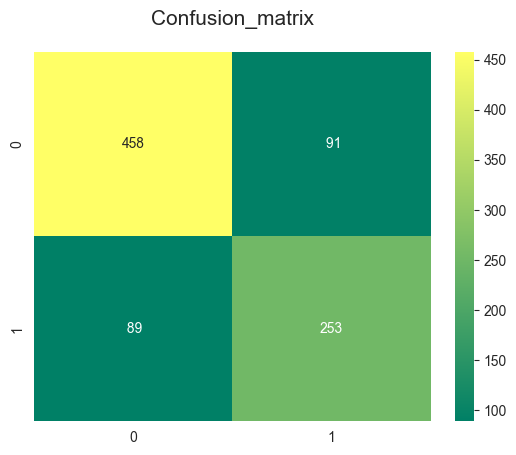

In [33]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
prediction_gnb = model.predict(X_test)
print("----------------------------The Accuracy of the model----------------------------")
print("The accuracy of the Gaussian Naive Bayes Classifier is", round(accuracy_score(prediction_gnb, y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
result_gnb = cross_val_score(model, all_features, targeted_feature, cv=10, scoring="accuracy")
print("The cross validated score for Gaussian Naive Bayes classifier is:", round(result_gnb.mean()*100,2))
y_pred = cross_val_predict(model, all_features, targeted_feature, cv=10)
sns.heatmap(confusion_matrix(targeted_feature, y_pred), annot=True, fmt="3.0f", cmap="summer")
plt.title("Confusion_matrix", y=1.05, size=15)

----------------------------The Accuracy of the model----------------------------
The accuracy of the DecisionTree Classifier is 78.36
The cross validated score for Decision Tree classifier is: 81.26


Text(0.5, 1.05, 'Confusion_matrix')

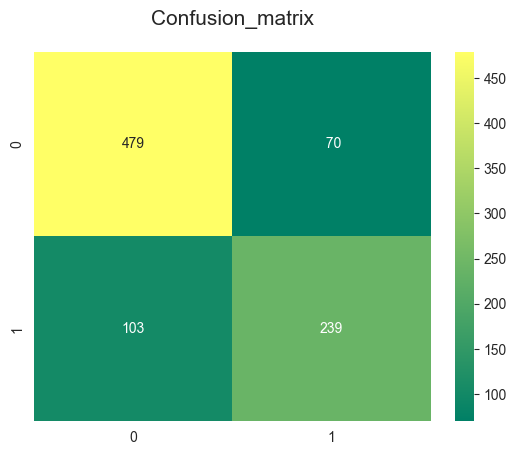

In [35]:
# Decision Tree
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion="gini", min_samples_split=10, min_samples_leaf=1, max_features="sqrt")
model.fit(X_train, y_train)
prediction_tree = model.predict(X_test)
print("----------------------------The Accuracy of the model----------------------------")
print("The accuracy of the DecisionTree Classifier is", round(accuracy_score(prediction_tree, y_test)*100, 2))
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
result_tree = cross_val_score(model, all_features, targeted_feature, cv=10, scoring="accuracy")
print("The cross validated score for Decision Tree classifier is:", round(result_tree.mean()*100, 2))
y_pred = cross_val_predict(model, all_features, targeted_feature, cv=10)
sns.heatmap(confusion_matrix(targeted_feature, y_pred), annot=True, fmt="3.0f", cmap="summer")
plt.title("Confusion_matrix", y=1.05, size=15)

## What is AdaBoost?

AdaBoost, short for Adaptive Boosting, is a machine learning algorithm that is used for binary classification problems. It is an ensemble learning algorithm that combines multiple weak classifiers to create a strong classifier.

The idea behind AdaBoost is to iteratively train weak classifiers on different subsets of the training data, where each subsequent weak classifier focuses more on the instances that were misclassified by the previous classifiers. This way, AdaBoost gives more weight to the difficult instances that are challenging to classify correctly.

Here's a high-level overview of the AdaBoost algorithm:

1. Assign equal weights to each training instance.
2. Train a weak classifier on the training data.
3. Evaluate the performance of the weak classifier and calculate its error rate.
4. Increase the weights of the misclassified instances.
5. Repeat steps 2-4 for a specified number of iterations or until a desired level of accuracy is achieved.
6. Combine the weak classifiers into a strong classifier by assigning higher weights to the more accurate classifiers.

During the prediction phase, the final classification is determined by aggregating the predictions of all the weak classifiers, with each weak classifier contributing a weighted vote. The weights are determined based on the accuracy of the weak classifier during the training phase.

AdaBoost is known for its ability to improve the performance of weak classifiers and produce strong classifiers with high accuracy. It is widely used in practical applications and can handle both categorical and numerical data. However, AdaBoost can be sensitive to noisy data and outliers, and it may overfit if the weak classifiers are too complex or the number of iterations is too high.

## What is the math behind AdaBoost?

The math behind AdaBoost involves the calculation of weights for training instances and the determination of the weights for the weak classifiers. Here's a mathematical overview of the AdaBoost algorithm:

1. Weight initialization:
   - For each training instance i, initialize the weight w_i to 1/N, where N is the total number of training instances.

2. Training weak classifiers:
   - For each iteration t:
     - Train a weak classifier h_t on the training data, using the instance weights w_i.
     - Calculate the error rate epsilon_t of the weak classifier h_t:
       - epsilon_t = sum(w_i * (1 if h_t(x_i) != y_i else 0) / sum(w_i)
       - where h_t(x_i) is the prediction of weak classifier h_t for instance x_i, and y_i is the true label of instance x_i.

3. Weight update:
   - Calculate the weight of the weak classifier alpha_t:
     - alpha_t = 0.5 * log((1 - epsilon_t) / epsilon_t)

   - Update the instance weights for the next iteration:
     - For each training instance i:
       - w_i = w_i * exp(alpha_t * (1 if h_t(x_i) != y_i else -1))

4. Normalize the instance weights:
   - Normalize the instance weights so that their sum is equal to 1:
     - w_i = w_i / sum(w_i) for each i.

5. Final strong classifier:
   - Combine the weak classifiers into a strong classifier by assigning weights to each weak classifier based on alpha_t.
   - The final prediction of the strong classifier is determined by taking a weighted vote of the weak classifiers' predictions.

During the prediction phase, the final strong classifier is used to classify new instances by taking a weighted vote of the weak classifiers' predictions, with each weak classifier's weight determined by alpha_t.

The AdaBoost algorithm uses these mathematical calculations to iteratively update instance weights and combine weak classifiers, with the aim of improving the overall performance of the ensemble.

----------------------------The Accuracy of the model----------------------------
The accuracy of the AdaBoostClassifier is 80.6
The cross validated score for AdaBoostClassifier is: 81.14


Text(0.5, 1.05, 'Confusion_matrix')

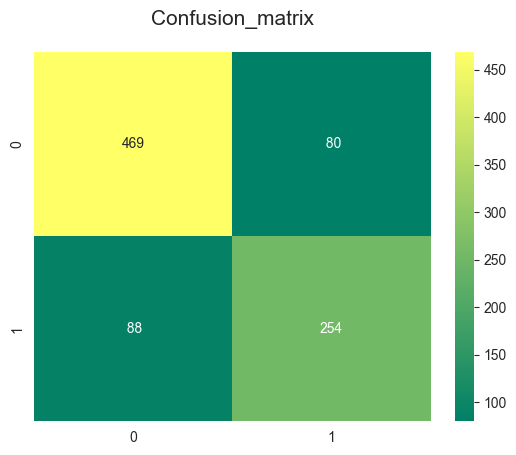

In [36]:
from sklearn.ensemble import AdaBoostClassifier
model = AdaBoostClassifier()
model.fit(X_train, y_train)
prediction_adb = model.predict(X_test)
print("----------------------------The Accuracy of the model----------------------------")
print("The accuracy of the AdaBoostClassifier is", round(accuracy_score(prediction_adb, y_test)*100, 2))
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
result_adb = cross_val_score(model, all_features, targeted_feature, cv=10, scoring="accuracy")
print("The cross validated score for AdaBoostClassifier is:", round(result_adb.mean()*100,2))
y_pred = cross_val_predict(model, all_features, targeted_feature,cv=10)
sns.heatmap(confusion_matrix(targeted_feature,y_pred), annot=True, fmt="3.0f", cmap="summer")
plt.title("Confusion_matrix", y=1.05, size=15)

## What is Linear Discriminant Analysis?

Linear Discriminant Analysis (LDA) is a dimensionality reduction and classification technique in machine learning and statistics. It is commonly used for supervised classification tasks, where the goal is to predict the class or category of a given input based on its features.

The main objective of LDA is to find a linear combination of features that maximizes the separation between different classes while minimizing the variance within each class. In other words, LDA aims to project the data onto a lower-dimensional space in such a way that the class separation is maximized.

Here's a high-level overview of how Linear Discriminant Analysis works:

1. Data preprocessing: Prepare the dataset by ensuring it meets the assumptions of LDA, such as the normality assumption of the input features.

2. Compute the class means: Calculate the mean vector for each class in the dataset. This provides an estimate of the central tendency of each class.

3. Compute the scatter matrices: Calculate the scatter matrix for each class, which represents the spread or variability of the data within each class. Two commonly used scatter matrices are the within-class scatter matrix (Sw) and the between-class scatter matrix (Sb).

4. Compute the eigenvectors and eigenvalues: Compute the eigenvectors and eigenvalues of the matrix (Sw^-1 * Sb). The eigenvectors represent the directions in the feature space that maximize the separation between classes, while the corresponding eigenvalues represent the importance or discriminative power of each eigenvector.

5. Select the top k eigenvectors: Sort the eigenvectors based on their corresponding eigenvalues and select the top k eigenvectors that capture the most discriminative information. These eigenvectors will form the projection matrix.

6. Project the data onto the lower-dimensional space: Use the selected eigenvectors to transform the original high-dimensional data into a lower-dimensional space. The transformed data can then be used for classification or visualization.

7. Classification: Apply a classifier, such as a linear classifier or a support vector machine (SVM), on the transformed data to make predictions on new instances.

Linear Discriminant Analysis is advantageous in situations where the classes are well-separated and the assumption of normally distributed data holds. It provides a low-dimensional representation of the data that maximizes the class separation, making it particularly useful for classification tasks.

## What is the math behind Linear Discriminant Analysis?

The math behind Linear Discriminant Analysis (LDA) involves computing scatter matrices, eigenvectors, and eigenvalues to find the optimal linear combination of features that maximizes class separation. Here's a mathematical overview of LDA:

Given a dataset with d-dimensional input features and their corresponding class labels:

1. Compute class means:
   - Calculate the mean vector (centroid) for each class c:
     - μ_c = (1 / N_c) * ∑(x_i), for all x_i in class c
     - where N_c is the number of instances in class c.

2. Compute scatter matrices:
   - Within-class scatter matrix (Sw):
     - Sw = ∑(S_c), for all classes c
     - where S_c is the scatter matrix for class c, computed as:
       - S_c = ∑((x_i - μ_c)(x_i - μ_c)^T), for all x_i in class c

   - Between-class scatter matrix (Sb):
     - Sb = ∑(N_c * (μ_c - μ)(μ_c - μ)^T), for all classes c
     - where μ is the overall mean of all instances in the dataset.

3. Compute eigenvectors and eigenvalues:
   - Solve the generalized eigenvalue problem:
     - Sw^(-1) * Sb * w = λ * w
     - where w is the eigenvector and λ is the eigenvalue.

4. Sort and select top k eigenvectors:
   - Sort the eigenvectors based on their corresponding eigenvalues in descending order.
   - Select the top k eigenvectors with the largest eigenvalues, forming a matrix W.

5. Project the data onto the lower-dimensional space:
   - Multiply the original data matrix X by the projection matrix W to obtain the transformed data matrix Y:
     - Y = X * W

The transformed data matrix Y can then be used for classification or visualization.

During classification, a new instance is projected onto the same lower-dimensional space using the projection matrix W. The class label for the new instance is determined based on a classifier applied to the transformed data.

The math behind LDA is focused on finding the optimal linear projection that maximizes class separation while minimizing the variance within each class. By selecting the eigenvectors corresponding to the largest eigenvalues, LDA captures the most discriminative information in the data.

----------------------------The Accuracy of the model----------------------------
The accuracy of the LinearDiscriminantAnalysis is 82.84
The cross validated score for AdaBoostClassifier is: 82.38


Text(0.5, 1.05, 'Confusion_matrix')

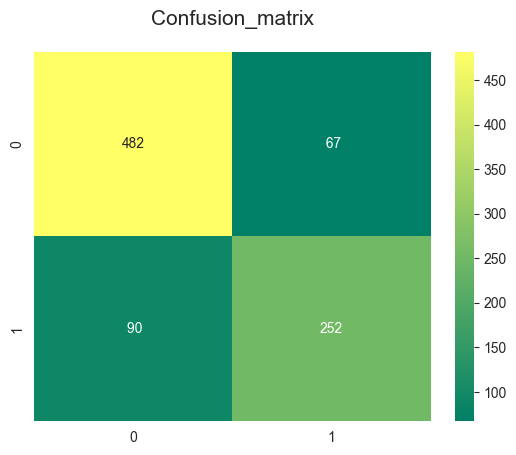

In [37]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model = LinearDiscriminantAnalysis()
model.fit(X_train, y_train)
prediction_lda = model.predict(X_test)
print("----------------------------The Accuracy of the model----------------------------")
print("The accuracy of the LinearDiscriminantAnalysis is", round(accuracy_score(prediction_lda, y_test)*100,2))
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
result_lda = cross_val_score(model, all_features,targeted_feature,cv=10,scoring="accuracy")
print("The cross validated score for AdaBoostClassifier is:", round(result_lda.mean()*100,2))
y_pred = cross_val_predict(model, all_features, targeted_feature, cv=10)
sns.heatmap(confusion_matrix(targeted_feature, y_pred), annot=True, fmt="3.0f", cmap="summer")
plt.title("Confusion_matrix", y=1.05, size=15)

## What is Gradient Boosting Classifier?

Gradient Boosting Classifier is a machine learning algorithm that belongs to the family of boosting algorithms. It is an ensemble method that combines multiple weak classifiers (decision trees in most cases) to create a strong classifier. Gradient Boosting Classifier builds the model in a stage-wise manner, where each new model is trained to correct the mistakes made by the previous models.

Here's an overview of how Gradient Boosting Classifier works:

1. Initialize the model: Start with an initial model, usually a weak classifier, which assigns equal weights to all training instances.

2. Fit the model: Fit the initial model to the training data and make predictions. Calculate the residuals (the difference between the predicted values and the true labels) for each training instance.

3. Build subsequent models: Train a new model to predict the residuals or errors made by the previous model. The new model is trained on the residuals, with the goal of reducing the errors made by the previous model. The learning process is typically done using gradient descent, hence the name "Gradient" Boosting.

4. Update the ensemble: Add the newly trained model to the ensemble and update the predictions by summing the predictions of all models in the ensemble.

5. Repeat steps 2-4: Repeat steps 2 to 4 for a specified number of iterations or until a desired level of performance is reached. Each new model focuses on correcting the mistakes made by the previous models.

6. Make predictions: To make predictions for new instances, apply the ensemble of models by summing their individual predictions. The final prediction is typically obtained by taking the majority vote (for classification) or averaging (for regression) of the predictions.

Gradient Boosting Classifier is known for its ability to handle complex nonlinear relationships in the data and achieve high predictive accuracy. It iteratively improves the ensemble by focusing on the instances that are difficult to classify correctly, effectively reducing the bias and variance of the overall model. However, it can be computationally expensive and sensitive to noisy or outlier data if not properly regularized.

## What is the math behind Gradient Boosting Classifier?

The math behind Gradient Boosting Classifier involves optimization through gradient descent and the use of weak classifiers (often decision trees). Here's a mathematical overview of how Gradient Boosting Classifier works:

Given a training dataset with input features X and corresponding labels y, and a loss function L(y, F(x)) that measures the difference between the true labels and the predictions, where F(x) is the predicted value for input x.

1. Initialize the model:
   - Start with an initial model F_0(x), which assigns equal weights to all training instances:
     - F_0(x) = 0

2. Iterative model training:
   - For each iteration t = 1 to T (where T is the number of boosting iterations):
     - Compute the negative gradient of the loss function with respect to the current model's predictions:
       - g_t(x) = -[∂L(y, F(x)) / ∂F(x)] (evaluated at F(x) = F_{t-1}(x))

     - Fit a weak classifier h_t(x) to the negative gradient g_t(x), i.e., train the weak classifier to predict the negative gradient:
       - h_t(x) = argmin_h ∑[L(y, F_{t-1}(x) + h(x))]

     - Compute the optimal step size or learning rate for the weak classifier:
       - η_t = argmin_η ∑[L(y, F_{t-1}(x) + η * h_t(x))]

     - Update the model by adding the weak classifier weighted by the learning rate:
       - F_t(x) = F_{t-1}(x) + η_t * h_t(x)

3. Make predictions:
   - To make predictions for new instances, apply the ensemble of models by summing their individual predictions:
     - F(x) = ∑[F_t(x)]

The algorithm minimizes the loss function by iteratively fitting weak classifiers to the negative gradient of the loss with respect to the current model's predictions. The weak classifiers are trained to correct the mistakes made by the previous models. The learning rate determines the contribution of each weak classifier to the ensemble.

The optimization process in Gradient Boosting Classifier involves finding the weak classifiers that minimize the loss function and determining the optimal learning rate to update the ensemble. The final prediction is obtained by summing the predictions of all weak classifiers.

Note that the actual implementation of Gradient Boosting Classifier may involve additional techniques, such as regularization, early stopping, and subsampling, to improve performance and prevent overfitting.

----------------------------The Accuracy of the model----------------------------
The accuracy of the Gradient Boosting Classifier is 81.72
The cross validated score for AdaBoostClassifier is: 81.26


Text(0.5, 1.05, 'Confusion_matrix')

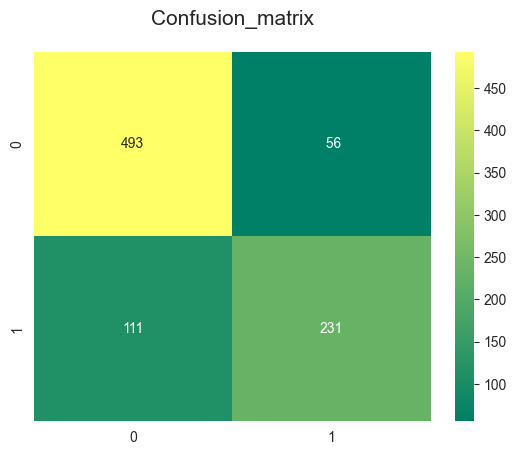

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)
prediction_gbc = model.predict(X_test)
print("----------------------------The Accuracy of the model----------------------------")
print("The accuracy of the Gradient Boosting Classifier is", round(accuracy_score(prediction_gbc, y_test)*100, 2))
kfold = KFold(n_splits=10, random_state=22, shuffle=True)
result_gbc = cross_val_score(model, all_features, targeted_feature, cv=10, scoring="accuracy")
print("The cross validated score for AdaBoostClassifier is:", round(result_gbc.mean()*100,2))
y_pred = cross_val_predict(model, all_features, targeted_feature, cv=10)
sns.heatmap(confusion_matrix(targeted_feature, y_pred), annot=True, fmt="3.0f", cmap="summer")
plt.title("Confusion_matrix", y=1.05, size=15)

## Model evaluation

In [40]:
models = pd.DataFrame({
    'Model': ['Support Vector Machines', 'KNN', 'Logistic Regression',
              'Random Forest', 'Naive Bayes', 'AdaBoostClassifier',
              'Gradient Decent', 'Linear Discriminant Analysis',
              'Decision Tree'],
    'Score': [result_svm.mean(), result_knn.mean(), result_lr.mean(),
              result_rm.mean(), result_gnb.mean(), result_adb.mean(),
              result_gbc.mean(), result_lda.mean(), result_tree.mean()]})
models.sort_values(by='Score',ascending=False)

,Model,Score
0,Support Vector Machines,0.832772
3,Random Forest,0.831685
7,Linear Discriminant Analysis,0.823820
2,Logistic Regression,0.819301
1,KNN,0.812622
6,Gradient Decent,0.812609
8,Decision Tree,0.812597
5,AdaBoostClassifier,0.811448
4,Naive Bayes,0.798002


In [41]:
train_X = traindf.drop("Survived", axis=1)
train_Y=traindf["Survived"]
test_X = testdf.drop("PassengerId", axis=1).copy()
train_X.shape, train_Y.shape, test_X.shape

((891, 22), (891,), (418, 22))

In [44]:
# Gradient boosting tunning

import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingClassifier
model = GradientBoostingClassifier()
param_grid = {
    "loss": ["log_loss"],
    "n_estimators": [100, 200, 300, 400],
    "learning_rate": [0.1, 0.05, 0.01, 0.001],
    "max_depth": [4, 8],
    "min_samples_leaf": [100, 150],
    "max_features": [0.3, 0.2, 0.1]
}

model_f = GridSearchCV(model, param_grid=param_grid, cv=kfold, scoring="accuracy", n_jobs = 4, verbose = 1)

model_f.fit(train_X, train_Y)

# Best score
print(model_f.best_score_)

# Best Estimator
model_f.best_estimator_

Fitting 10 folds for each of 192 candidates, totalling 1920 fits
0.811498127340824


GradientBoostingClassifier(max_depth=8, max_features=0.3, min_samples_leaf=100,
                           n_estimators=200)

In [45]:
# Random Forest Classifier Parameters tunning
model = RandomForestClassifier()
n_estim=range(100,1000,100)

## Search grid for optimal parameters
param_grid = {"n_estimators" :n_estim}


model_rf = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

model_rf.fit(train_X,train_Y)



# Best score
print(model_rf.best_score_)

#best estimator
model_rf.best_estimator_

Fitting 5 folds for each of 9 candidates, totalling 45 fits
0.8148389931579938


RandomForestClassifier(n_estimators=700)

In [46]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
model =LinearDiscriminantAnalysis()
param_grid = {'tol':[0.001,0.01,.1,.2]}

modell = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

modell.fit(train_X,train_Y)

# Best score
print(modell.best_score_)

# Best Estimator
modell.best_estimator_

Fitting 5 folds for each of 4 candidates, totalling 20 fits
0.8181846713953927


LinearDiscriminantAnalysis(tol=0.001)

In [52]:
model= SVC()
param_grid = {"kernel": ["rbf","linear"],
                  "gamma": [ 0.001, 0.01, 0.1, 1],
                  "C": [1, 10, 50, 100,200,300, 1000]}

modelsvm = GridSearchCV(model,param_grid = param_grid, cv=5, scoring="accuracy", n_jobs= 4, verbose = 1)

modelsvm.fit(train_X,train_Y)

# Best score
print(modelsvm.best_score_)

modelsvm.best_estimator_

Fitting 5 folds for each of 56 candidates, totalling 280 fits
0.8361182599962339


SVC(C=50, gamma=0.01)

Important features
____________________________________________________________
89.0


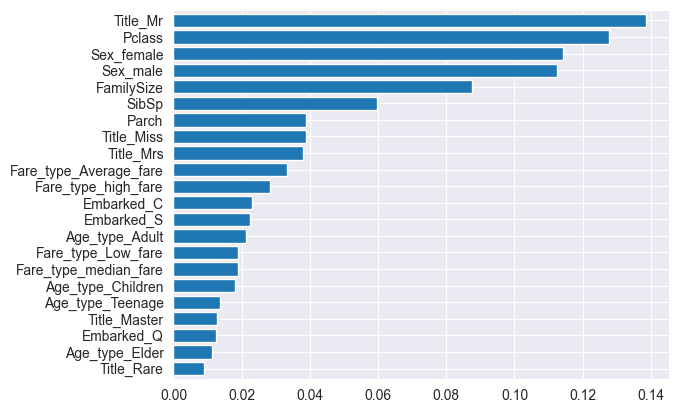

In [53]:
# Random Forests
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(bootstrap=True, class_weight=None, criterion="gini",
            max_depth=None, max_features="sqrt", max_leaf_nodes=None,
            min_impurity_decrease=0.0,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=400, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
random_forest.fit(train_X, train_Y)
Y_pred_rf = random_forest.predict(test_X)
random_forest.score(train_X,train_Y)
acc_random_forest = round(random_forest.score(train_X, train_Y) * 100, 2)

print("Important features")
pd.Series(random_forest.feature_importances_,train_X.columns).sort_values(ascending=True).plot.barh(width=0.8)
print('__'*30)
print(acc_random_forest)

In [55]:
## Save submission

submission = pd.DataFrame({
        "PassengerId": test_df["PassengerId"],
        "Survived": Y_pred_rf})
submission.to_csv("submission.csv", index=False)